**Sobre a base de dados**

Os dados de rotatividade de clientes de telecomunicações contêm informações sobre uma empresa de telecomunicações fictícia que forneceu serviços de telefone residencial e Internet para 7.043 clientes na Califórnia.

**Dicionário de dados**


* CustomerId: Customer Id
* Gender: Gender
* SeniorCitizen: Whether the customer is elderly (1.0)
* Partner: Whether the customer has a partner (Yes, No)
* Dependents: Whether the customer has dependents (Yes, No) (child, mother, father...)
* tenure: The number of months the customer stays in the company
* PhoneService: Whether the customer has phone service (Yes, No)
* MultipleLines: Whether the customer has more than one line (Yes, No, No phone service)
* InternetService: Customer's internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security (Yes, No, no Internet service)
* OnlineBackup: Whether the customer has an online backup (Yes, No, no Internet service)
* DeviceProtection: Whether the customer has device protection (Yes, No, no Internet service)
* TechSupport: Whether the customer receives technical support (Yes, No, no Internet service)
* StreamingTV: Whether the customer has broadcast TV (Yes, No, no Internet service)
* StreamingMovies: Whether the customer is streaming movies (Yes, No, no Internet service)
* Contract: Customer's contract period (Month to month, One year, Two years)
* PaperlessBilling: Whether the customer has a paperless invoice (Yes, No)
* PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer, Credit card)
* MonthlyCharges: Amount collected from the customer monthly
* TotalCharges: Total amount collected from the customer
* Churn: Yes = the customer left the company this Month. No = the customer remained with the company.

In [ ]:
import pandas as pd

In [ ]:
path = 'https://raw.githubusercontent.com/profEraylson/datasets/main/churn_telecom.csv'

df = pd.read_csv(path)

#### Faça uma comparação entre os modelos Regressão Logistica, KNN e Decision Tree e responda as seguintes perguntas:

* Qual modelo apresenta o maior desempenho em treinamento?
* Qual modelo apresenta o maior desempenho em teste?
* Qual modelo você selecionaria para colocar em um sistema de previsão de churn?


Aplique as técnicas vistas em aula e selecione uma ou mais métricas de classificação para avaliar o desempenho dos modelos.


---


*Utilize o seu conhecimento sobre os dados para selecionar e tratar as features da melhor forma.*

*Busque justificar a escolha das técnicas. Exemplo: "Estou aplicando a transformação OneHotEncoder pois...", "Estou utilizando um crossvalidation pois..."*


#### Antes de tudo, fazer a verificação dos dados

In [ ]:
df.iloc[:10]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.iloc[-10:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### Seleção dos dados numéricos

transformando o Churn em binário:

In [ ]:
df['Churn'] = df["Churn"].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df = df[pd.to_numeric(df['TotalCharges'], errors='coerce').notnull()]

In [ ]:
df_numbers = df.select_dtypes("number")

In [ ]:
df_numbers

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1
...,...,...,...,...
7038,0,24,84.80,0
7039,0,72,103.20,0
7040,0,11,29.60,0
7041,1,4,74.40,1


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,0.265785
std,0.368844,24.545260,30.085974,0.441782
min,0.000000,1.000000,18.250000,0.000000
25%,0.000000,9.000000,35.587500,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.862500,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [ ]:
df_numbers = df.select_dtypes('number')

In [ ]:
df_numbers.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,0.265785
std,0.368844,24.545260,30.085974,0.441782
min,0.000000,1.000000,18.250000,0.000000
25%,0.000000,9.000000,35.587500,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.862500,1.000000
max,1.000000,72.000000,118.750000,1.000000


#### Análise exploratória

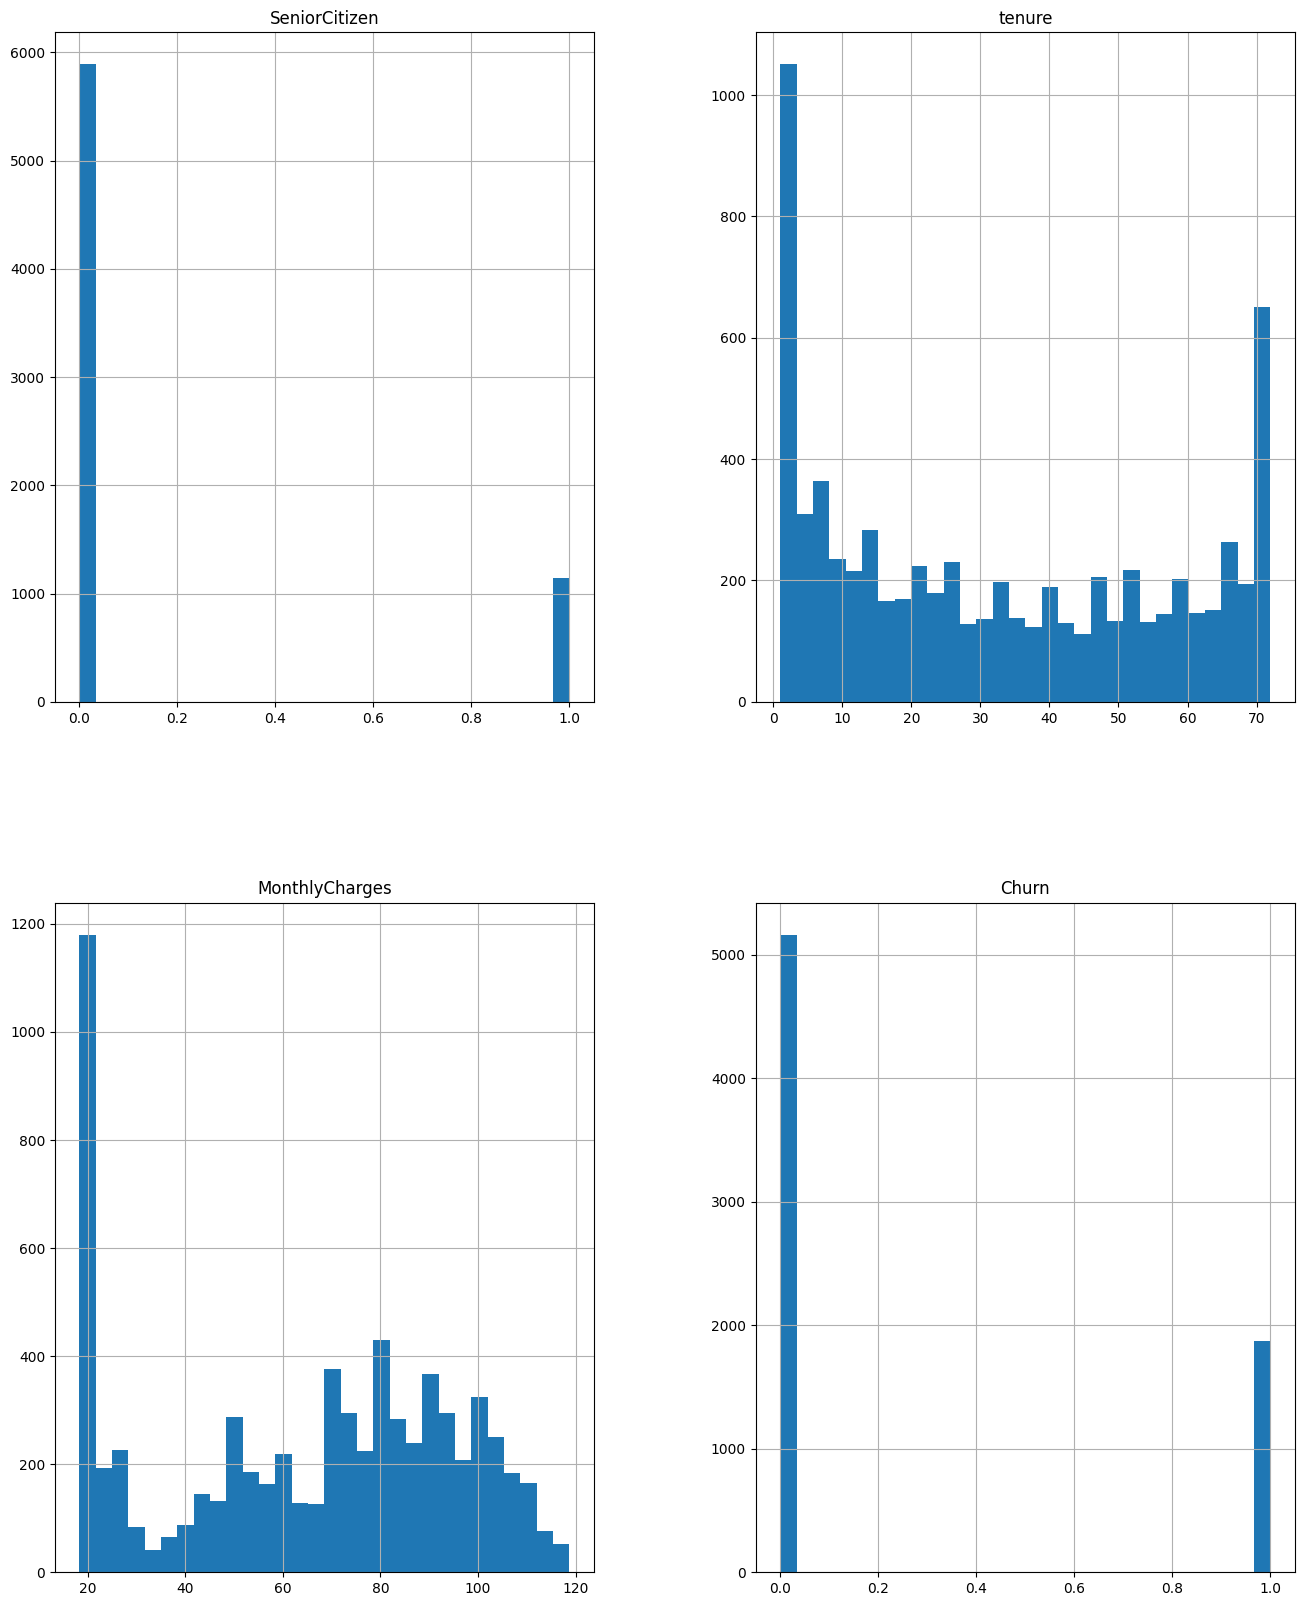

In [ ]:
df_numbers.hist(figsize=(16,20), bins = 30);

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

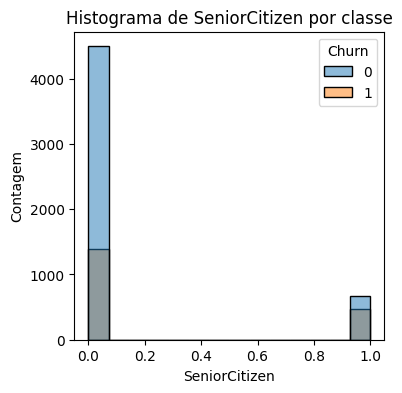

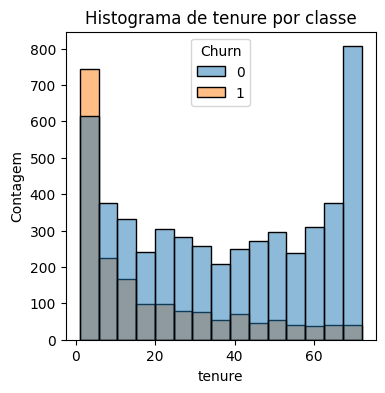

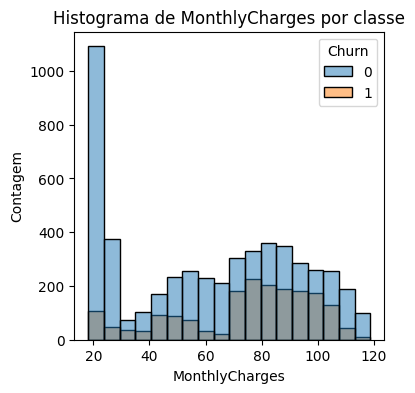

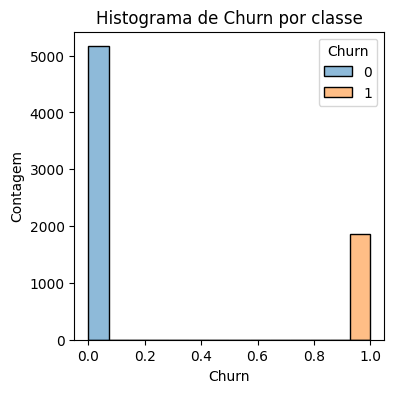

In [ ]:
for coluna in df_numbers.columns:
  plt.figure(figsize=(4,4))
  sns.histplot(data=df, x=coluna, hue='Churn')
  plt.title(f'Histograma de {coluna} por classe')
  plt.xlabel(coluna)
  plt.ylabel('Contagem')
  plt.show()


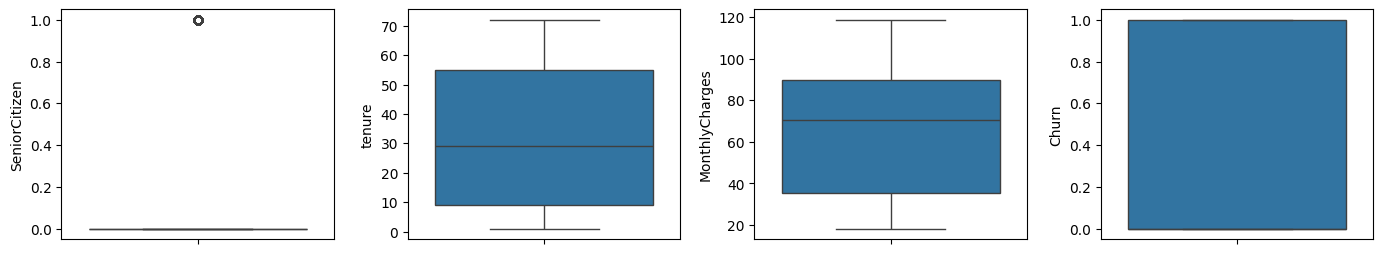

In [ ]:
fig = plt.figure(figsize=(14,15))
for index, col in enumerate(df_numbers.columns):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=df_numbers)
fig.tight_layout(pad=1.0)

#### Analisando o restante das colunas categóricas

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [ ]:
cat_columns = list(df.select_dtypes('object').columns)
cat_columns

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [ ]:
df[cat_columns]

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6


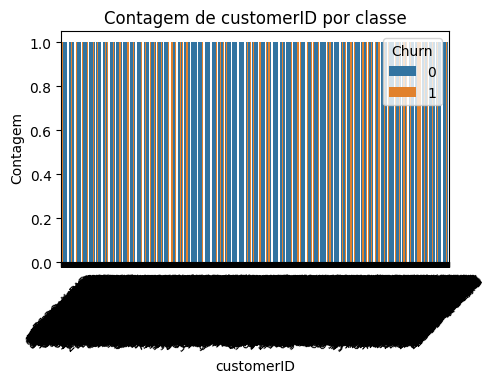

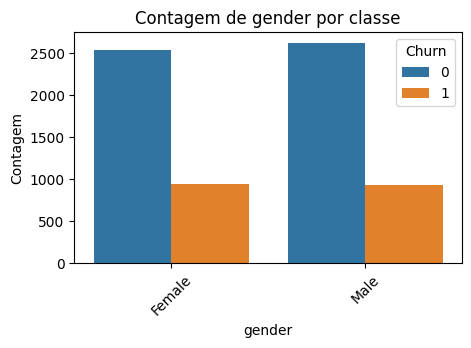

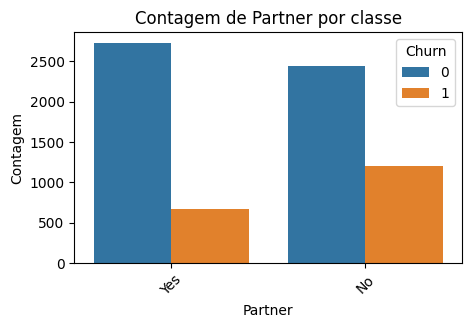

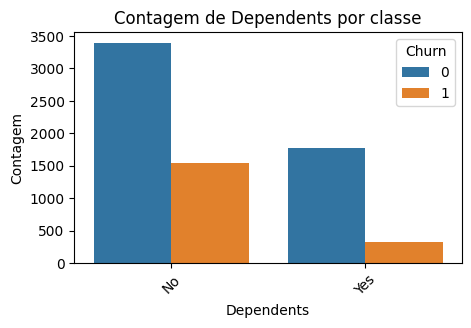

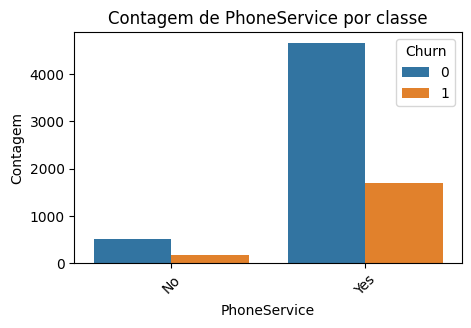

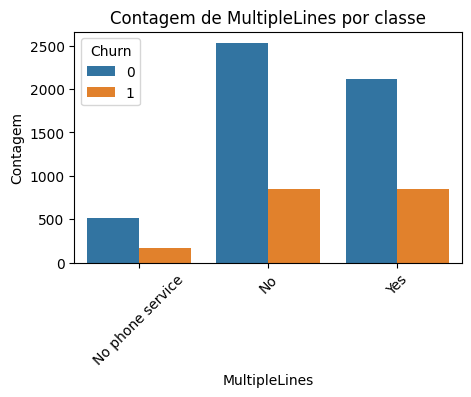

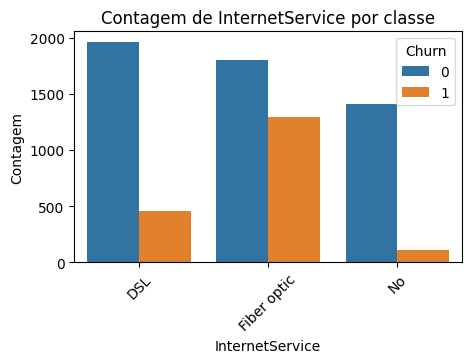

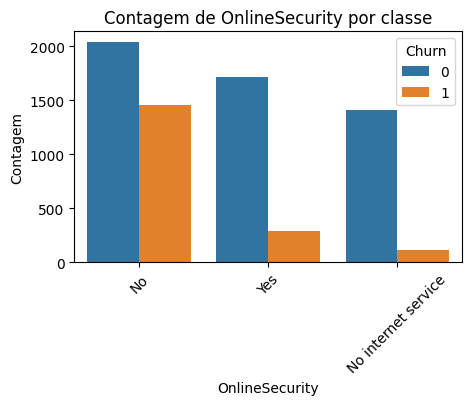

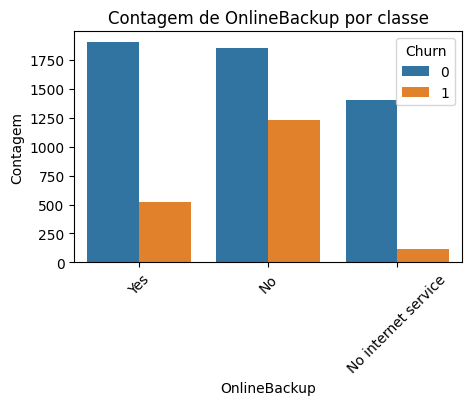

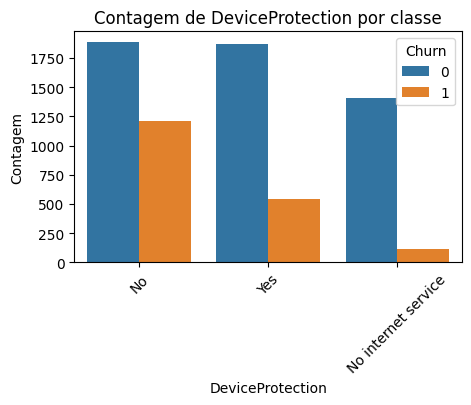

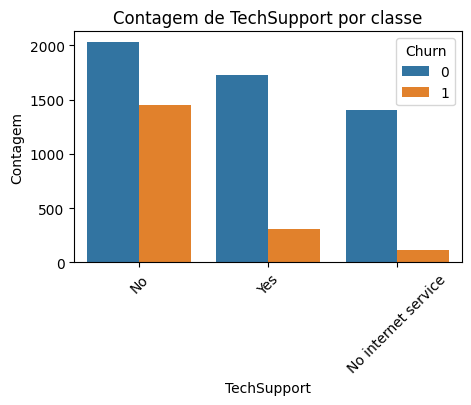

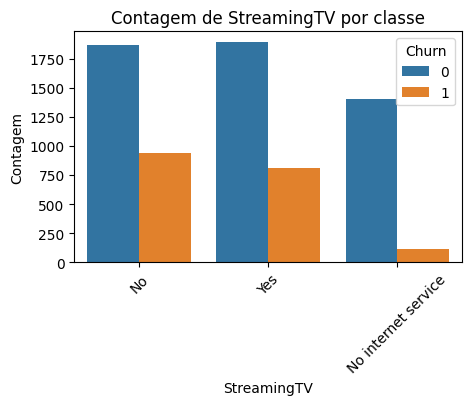

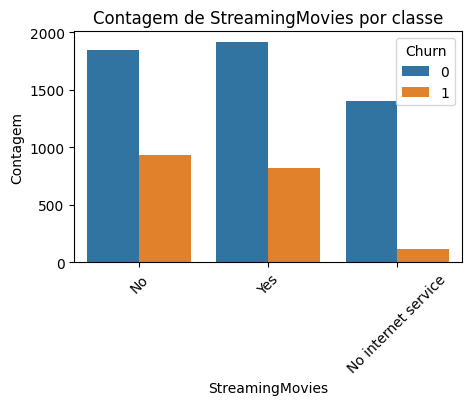

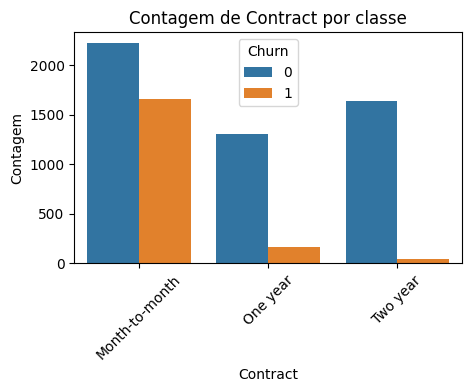

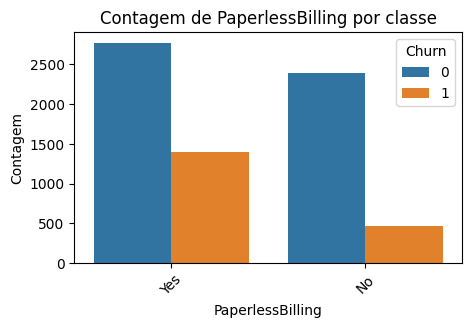

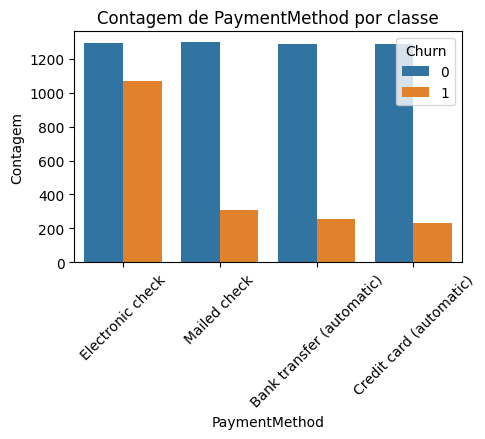

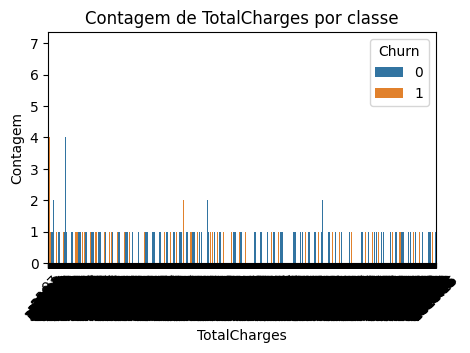

In [ ]:
for cat_column in cat_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=cat_column, hue='Churn')
    plt.title(f'Contagem de {cat_column} por classe')
    plt.xlabel(cat_column)
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
for coluna in cat_columns:
  mensagem = f"Tabela de contigência entre {coluna} e o Churn"
  print(len(mensagem) * "-")
  print(mensagem)
  print(len(mensagem) * "-")
  print(pd.crosstab(df[coluna], df['Churn'], normalize='index').mul(100).round(2))
  print(len(mensagem) * "#")


------------------------------------------------
Tabela de contigência entre customerID e o Churn
------------------------------------------------
Churn           0      1
customerID              
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7032 rows x 2 columns]
################################################
--------------------------------------------
Tabela de contigência entre gender e o Churn
--------------------------------------------
Churn       0      1
gender              
Female  73.04  26.96
Male    73.80  26.20
############################################
---------------------------------------------
Tabela de contigência entre Partner e o Churn
---------------------------------------------
Churn        0      1
Partner              
No      

#### Constrição de features

In [ ]:
df['StreamingServices'] = df["StreamingTV"]
#Ambos os servicos de streaming apresentam valores semelhantes em relação ao Churn

<ipython-input-1010-fe03ad8c8266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StreamingServices'] = df["StreamingTV"]


In [ ]:
df['Online/Device_Security'] = df['OnlineSecurity']
#Todas as três features de proteção e segurança apresetam os mesmos valores

<ipython-input-1011-dcbc01049a06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Online/Device_Security'] = df['OnlineSecurity']


In [ ]:
df['Partner/Dependents'] = df['Dependents']
#Tanto Partner quanto Dependents apresentaram valores muito proximos na contingencia do Churn

<ipython-input-1012-044977027adc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Partner/Dependents'] = df['Dependents']


#### Recorte da base de dados

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df['customerID'].nunique()

7032

In [ ]:
cat_columns

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

#### Remoção das features redundantes

In [ ]:
columns_to_drop = ['customerID', 'gender', 'PhoneService',"StreamingMovies" ,'StreamingTV', 'DeviceProtection', "MultipleLines", "OnlineBackup", "OnlineSecurity", "Dependents", "Partner"]
df_selected = df.drop(columns_to_drop, axis = 1)
cat_columns = list(df_selected.select_dtypes('object'))

#### Pré processamento dos dados

In [ ]:
X = df_selected.drop('Churn', axis = 1)
y = df_selected['Churn']

In [ ]:
X

,SeniorCitizen,tenure,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,StreamingServices,Online/Device_Security,Partner/Dependents
0,0,1,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No,No
1,0,34,DSL,No,One year,No,Mailed check,56.95,1889.5,No,Yes,No
2,0,2,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15,No,Yes,No
3,0,45,DSL,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No,Yes,No
4,0,2,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,DSL,Yes,One year,Yes,Mailed check,84.80,1990.5,Yes,Yes,Yes
7039,0,72,Fiber optic,No,One year,Yes,Credit card (automatic),103.20,7362.9,Yes,No,Yes
7040,0,11,DSL,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Yes,Yes
7041,1,4,Fiber optic,No,Month-to-month,Yes,Mailed check,74.40,306.6,No,No,No


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
y_train.value_counts(normalize = True)

0    0.734254
1    0.265746
Name: Churn, dtype: float64

In [ ]:
y_test.value_counts(normalize = True)

0    0.734123
1    0.265877
Name: Churn, dtype: float64

#### Tratar as features categoricas

In [ ]:
X_test

,SeniorCitizen,tenure,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,StreamingServices,Online/Device_Security,Partner/Dependents
2481,1,61,No,No internet service,Two year,No,Bank transfer (automatic),25.00,1501.75,No internet service,No internet service,No
6784,0,19,No,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85,No internet service,No internet service,No
6125,0,13,Fiber optic,No,Month-to-month,Yes,Credit card (automatic),102.25,1359,Yes,No,No
3052,0,37,DSL,No,Month-to-month,Yes,Mailed check,55.05,2030.75,No,Yes,No
4099,0,6,DSL,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
2763,0,64,Fiber optic,No,Month-to-month,No,Electronic check,81.05,5135.35,No,Yes,Yes
6747,0,52,DSL,No,One year,No,Mailed check,35.45,1958.95,No,Yes,No
1700,0,47,No,No internet service,Two year,No,Bank transfer (automatic),20.45,943,No internet service,No internet service,No
1099,0,5,DSL,Yes,Month-to-month,Yes,Mailed check,55.70,259.4,No,No,Yes


In [ ]:
X_train[cat_columns].isna().sum()

InternetService           0
TechSupport               0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
TotalCharges              0
StreamingServices         0
Online/Device_Security    0
Partner/Dependents        0
dtype: int64

In [ ]:
X_train[cat_columns]

,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,StreamingServices,Online/Device_Security,Partner/Dependents
3946,DSL,Yes,Month-to-month,No,Mailed check,539.85,Yes,Yes,No
3394,DSL,No,One year,No,Electronic check,1581.95,No,Yes,No
1635,DSL,No,One year,Yes,Electronic check,220.45,Yes,No,No
4088,Fiber optic,No,Month-to-month,No,Electronic check,520,No,No,No
1886,DSL,Yes,Two year,Yes,Bank transfer (automatic),3953.7,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...
3778,DSL,No,Month-to-month,No,Bank transfer (automatic),137.25,No,No,No
5199,Fiber optic,Yes,One year,Yes,Electronic check,5703.25,Yes,No,No
5235,Fiber optic,No,Month-to-month,Yes,Electronic check,784.45,No,Yes,No
5399,No,No internet service,One year,No,Bank transfer (automatic),989.05,No internet service,No internet service,No


In [ ]:
!pip install category_encoders

In [ ]:
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder  import TargetEncoder
from category_encoders.ordinal  import OrdinalEncoder

In [ ]:
cat_columns

['InternetService',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'StreamingServices',
 'Online/Device_Security',
 'Partner/Dependents']

In [ ]:
X_train[cat_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 3946 to 862
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   InternetService         4922 non-null   object
 1   TechSupport             4922 non-null   object
 2   Contract                4922 non-null   object
 3   PaperlessBilling        4922 non-null   object
 4   PaymentMethod           4922 non-null   object
 5   TotalCharges            4922 non-null   object
 6   StreamingServices       4922 non-null   object
 7   Online/Device_Security  4922 non-null   object
 8   Partner/Dependents      4922 non-null   object
dtypes: object(9)
memory usage: 384.5+ KB


#### Encoding das features categóricas

Aqui eu utilizei o OneHotEncoder por se tratarem de features catrgóricas de mesmo peso

In [ ]:
cat_to_onehot = ['Partner/Dependents', 'PaperlessBilling', "TechSupport", "PaymentMethod", "StreamingServices", "Online/Device_Security", "InternetService"]
one_hot_enc = OneHotEncoder(cols = cat_to_onehot)
one_hot_enc.fit(X_train)
X_train_encode = one_hot_enc.transform(X_train)
X_train_encode

,SeniorCitizen,tenure,InternetService_1,InternetService_2,InternetService_3,TechSupport_1,TechSupport_2,TechSupport_3,Contract,PaperlessBilling_1,...,MonthlyCharges,TotalCharges,StreamingServices_1,StreamingServices_2,StreamingServices_3,Online/Device_Security_1,Online/Device_Security_2,Online/Device_Security_3,Partner/Dependents_1,Partner/Dependents_2
3946,0,9,1,0,0,1,0,0,Month-to-month,1,...,58.50,539.85,1,0,0,1,0,0,1,0
3394,0,26,1,0,0,0,1,0,One year,1,...,61.55,1581.95,0,1,0,1,0,0,1,0
1635,0,3,1,0,0,0,1,0,One year,0,...,69.95,220.45,1,0,0,0,1,0,1,0
4088,0,7,0,1,0,0,1,0,Month-to-month,1,...,73.60,520,0,1,0,0,1,0,1,0
1886,0,67,1,0,0,1,0,0,Two year,0,...,60.40,3953.7,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,3,1,0,0,0,1,0,Month-to-month,1,...,50.40,137.25,0,1,0,0,1,0,1,0
5199,0,51,0,1,0,1,0,0,One year,0,...,111.50,5703.25,1,0,0,0,1,0,1,0
5235,0,9,0,1,0,0,1,0,Month-to-month,0,...,81.15,784.45,0,1,0,1,0,0,1,0
5399,0,50,0,0,1,0,0,1,One year,1,...,19.75,989.05,0,0,1,0,0,1,1,0


In [ ]:
X_train['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Resolvi utilizar o OrdinalEncoder aqui porque é notável a queda em relação ao Churn dependendo do tipo de contrato. Os dados da feature "Contract" passam uma mensagem de ordinalidade (mensal, anual e bianual)

In [ ]:
cat_to_ordinal = ['Contract']


mapping_education = [ { 'col' :  'Contract',
   'mapping': {
    'Month-to-month' : 1,
    'One year' : 2,
    'Two year' :3
   }
}
]

ordinal_enc = OrdinalEncoder(cols= cat_to_ordinal, mapping=mapping_education)
ordinal_enc.fit(X_train_encode)
X_train_encode = ordinal_enc.transform(X_train_encode)

In [ ]:
X_train_encode

,SeniorCitizen,tenure,InternetService_1,InternetService_2,InternetService_3,TechSupport_1,TechSupport_2,TechSupport_3,Contract,PaperlessBilling_1,...,MonthlyCharges,TotalCharges,StreamingServices_1,StreamingServices_2,StreamingServices_3,Online/Device_Security_1,Online/Device_Security_2,Online/Device_Security_3,Partner/Dependents_1,Partner/Dependents_2
3946,0,9,1,0,0,1,0,0,1,1,...,58.50,539.85,1,0,0,1,0,0,1,0
3394,0,26,1,0,0,0,1,0,2,1,...,61.55,1581.95,0,1,0,1,0,0,1,0
1635,0,3,1,0,0,0,1,0,2,0,...,69.95,220.45,1,0,0,0,1,0,1,0
4088,0,7,0,1,0,0,1,0,1,1,...,73.60,520,0,1,0,0,1,0,1,0
1886,0,67,1,0,0,1,0,0,3,0,...,60.40,3953.7,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,0,3,1,0,0,0,1,0,1,1,...,50.40,137.25,0,1,0,0,1,0,1,0
5199,0,51,0,1,0,1,0,0,2,0,...,111.50,5703.25,1,0,0,0,1,0,1,0
5235,0,9,0,1,0,0,1,0,1,0,...,81.15,784.45,0,1,0,1,0,0,1,0
5399,0,50,0,0,1,0,0,1,2,1,...,19.75,989.05,0,0,1,0,0,1,1,0


In [ ]:
X_train_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 3946 to 862
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SeniorCitizen             4922 non-null   int64  
 1   tenure                    4922 non-null   int64  
 2   InternetService_1         4922 non-null   int64  
 3   InternetService_2         4922 non-null   int64  
 4   InternetService_3         4922 non-null   int64  
 5   TechSupport_1             4922 non-null   int64  
 6   TechSupport_2             4922 non-null   int64  
 7   TechSupport_3             4922 non-null   int64  
 8   Contract                  4922 non-null   int64  
 9   PaperlessBilling_1        4922 non-null   int64  
 10  PaperlessBilling_2        4922 non-null   int64  
 11  PaymentMethod_1           4922 non-null   int64  
 12  PaymentMethod_2           4922 non-null   int64  
 13  PaymentMethod_3           4922 non-null   int64  
 14  Paymen

In [ ]:
X_test_encode = one_hot_enc.transform(X_test)
X_test_encode = ordinal_enc.transform(X_test_encode)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

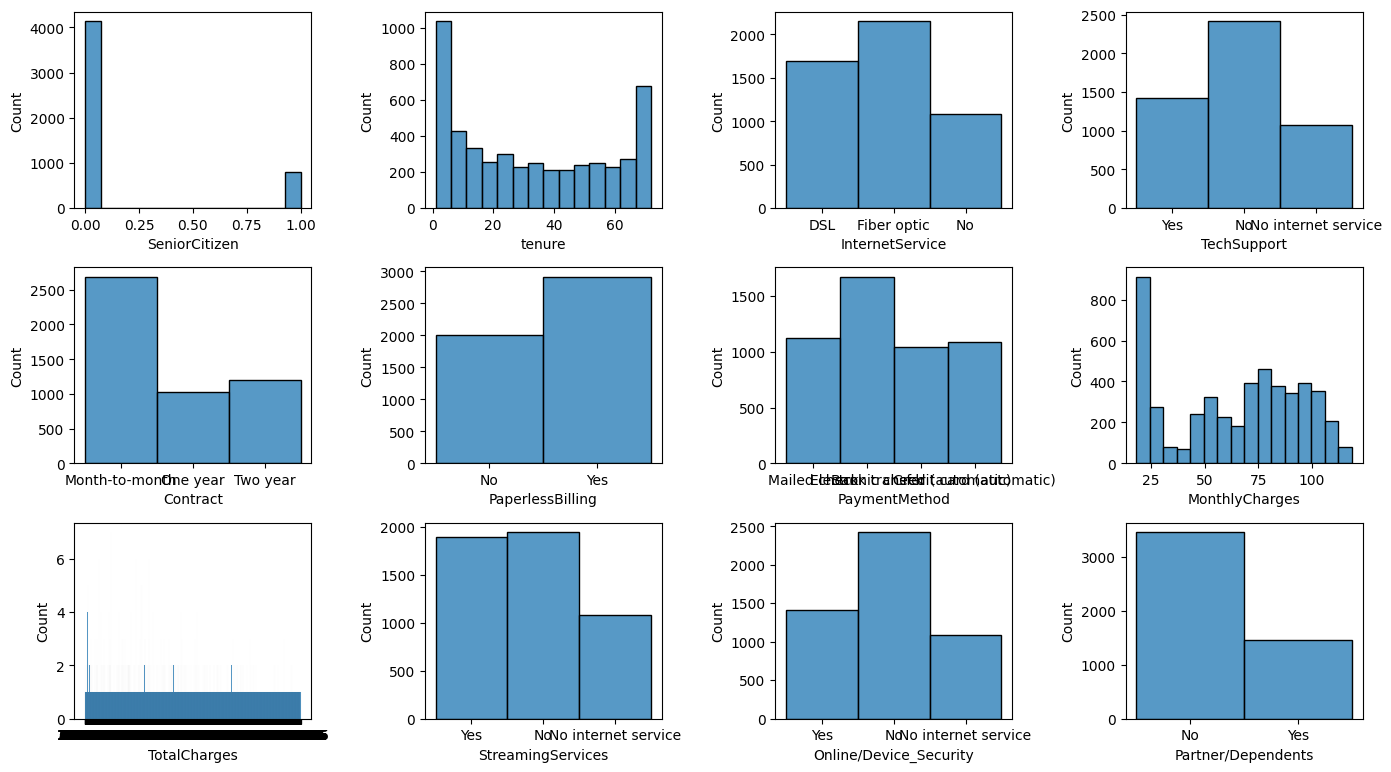

In [ ]:
fig = plt.figure(figsize=(14,15))
for index, col in enumerate(X_train.columns):
    plt.subplot(6,4,index+1)
    sns.histplot(x=col, data=X_train)
fig.tight_layout(pad=1.0)

#### Normalização

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().set_output(transform = "pandas")
scaler.fit(X_train_encode)
X_train_norm = scaler.transform(X_train_encode)
X_test_norm = scaler.transform(X_test_encode)

In [ ]:
X_train_norm.describe()

,SeniorCitizen,tenure,InternetService_1,InternetService_2,InternetService_3,TechSupport_1,TechSupport_2,TechSupport_3,Contract,PaperlessBilling_1,...,MonthlyCharges,TotalCharges,StreamingServices_1,StreamingServices_2,StreamingServices_3,Online/Device_Security_1,Online/Device_Security_2,Online/Device_Security_3,Partner/Dependents_1,Partner/Dependents_2
count,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,...,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000,4922.000000
mean,0.160301,0.443087,0.343560,0.437017,0.219423,0.290329,0.490248,0.219423,0.349045,0.406948,...,0.461900,0.260381,0.385209,0.395368,0.219423,0.287688,0.492889,0.219423,0.702966,0.297034
std,0.366922,0.346990,0.474944,0.496068,0.413898,0.453960,0.499956,0.413898,0.418249,0.491315,...,0.300148,0.261016,0.486694,0.488979,0.413898,0.452731,0.500000,0.413898,0.456998,0.456998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.168411,0.043991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.394366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.518685,0.157960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.774648,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.500000,1.000000,...,0.713004,0.432389,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Etapa de Modelegam e Treinamento

In [ ]:
X_train_reduzido, X_val, y_train_reduzido, y_val = train_test_split(X_train_norm, y_train, test_size=0.2, random_state=42)

#### Regressão Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
penaltys = [None, 'l1', 'l2', 'elasticnet']
solvers = ['lbfgs', 'liblinear']

best_f1_score = 0
best_penalty = None
best_solver = None


for penalty in penaltys:
  for solver in solvers:
    print(f'{penalty} e {solver}')
    try:

      logistic = LogisticRegression(penalty = penalty, solver=solver, random_state=42)
      logistic.fit(X_train_reduzido, y_train_reduzido)
      pred_val = logistic.predict(X_val)

    except ValueError:
      print(f"{penalty} e {solver} não podem ser combinados!")
      continue

    f1 = f1_score(y_val, pred_val)
    print(f1)
    if f1 > best_f1_score:

      best_f1_score = f1
      best_penalty = penalty
      best_solver = solver

None e lbfgs
0.5777777777777777
None e liblinear
None e liblinear não podem ser combinados!
l1 e lbfgs
l1 e lbfgs não podem ser combinados!
l1 e liblinear
0.5766871165644171
l2 e lbfgs
0.5725971370143149
l2 e liblinear
0.5725971370143149
elasticnet e lbfgs
elasticnet e lbfgs não podem ser combinados!
elasticnet e liblinear
elasticnet e liblinear não podem ser combinados!


In [ ]:
(best_solver, best_penalty)

('lbfgs', None)

In [ ]:
logistic = LogisticRegression(penalty = best_penalty, solver=best_solver, random_state=42)
logistic.fit(X_train_norm, y_train)

LogisticRegression(penalty=None, random_state=42)

In [ ]:
predict_train = logistic.predict(X_train_norm)
predict_test = logistic.predict(X_test_norm)

In [ ]:
from sklearn.metrics import accuracy_score as ACC

ACC(y_train, predict_train)

0.8017066233238521

In [ ]:
y_train.value_counts(normalize = True)

0    0.734254
1    0.265746
Name: Churn, dtype: float64

In [ ]:
ACC(y_test, predict_test)

0.795260663507109

In [ ]:
y_test.value_counts(normalize = True)

0    0.734123
1    0.265877
Name: Churn, dtype: float64

#### Validação do modelo com a matriz de confusão

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

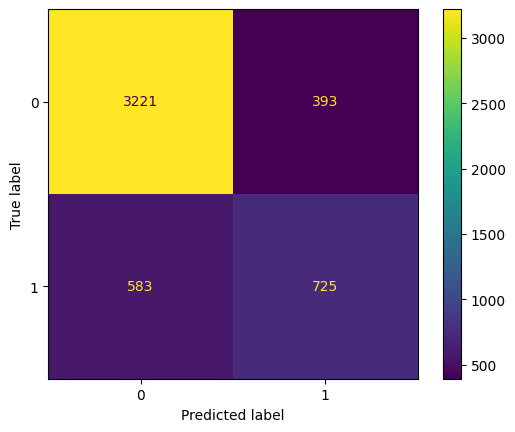

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, predict_train)

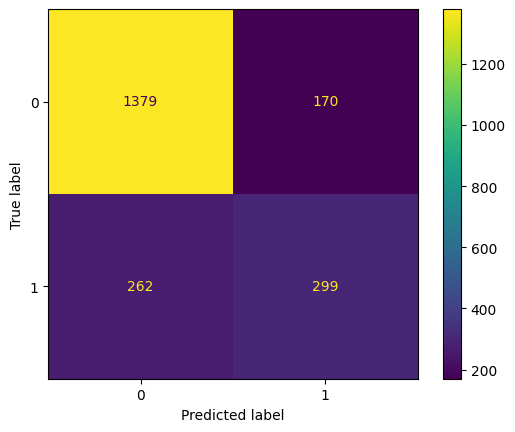

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train, predict_train))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3614
           1       0.65      0.55      0.60      1308

    accuracy                           0.80      4922
   macro avg       0.75      0.72      0.73      4922
weighted avg       0.79      0.80      0.80      4922



In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



### K vizinhos mais próximos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
ks = [3, 5, 7, 9, 11, 13, 15, 17, 19]
best_f1_score = 0
best_k = None
for k in ks:
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train_reduzido, y_train_reduzido)
  y_pred = neigh.predict(X_val)
  f1 = f1_score(y_val, y_pred)
  if f1 > best_f1_score:
    best_f1_score = f1
    best_k = k

In [ ]:
best_f1_score

0.5423728813559323

In [ ]:
best_k

19

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
predict_train = neigh.predict(X_train_norm)
predict_test = neigh.predict(X_test_norm)

#### Validação do modelo com a matriz de confusão

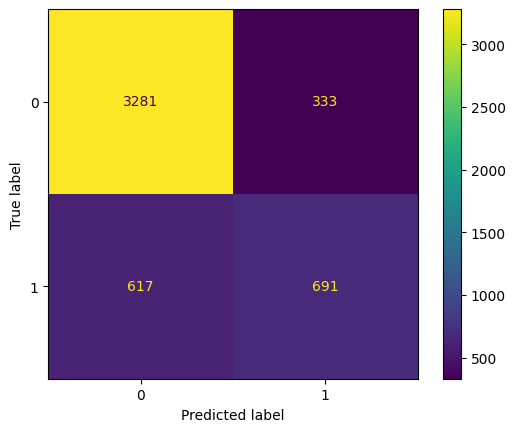

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, predict_train)

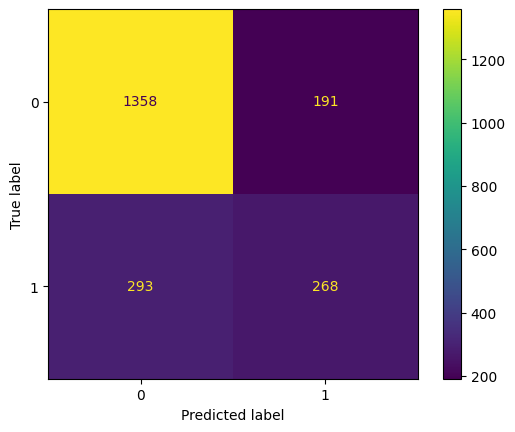

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_test)

In [ ]:
print(classification_report(y_train, predict_train))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3614
           1       0.67      0.53      0.59      1308

    accuracy                           0.81      4922
   macro avg       0.76      0.72      0.73      4922
weighted avg       0.80      0.81      0.80      4922



In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1549
           1       0.58      0.48      0.53       561

    accuracy                           0.77      2110
   macro avg       0.70      0.68      0.69      2110
weighted avg       0.76      0.77      0.76      2110



#### Implementação da Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
criterios = ['gini', 'entropy', 'log_loss']
max_depths = [5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100]
best_f1_score = 0
best_criterio = None
best_max_depth = None


for criterio in criterios:
  for max_depth in max_depths:
    decTree = DecisionTreeClassifier(criterion=criterio, max_depth=max_depth, random_state=42)
    decTree.fit(X_train_reduzido, y_train_reduzido)

    y_pred = decTree.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    if f1 > best_f1_score:
      best_f1_score = f1
      best_criterio = criterio
      best_max_depth = max_depth

In [ ]:
decTree = DecisionTreeClassifier(criterion=best_criterio, max_depth=best_max_depth, random_state=42)
decTree.fit(X_train_norm, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

#### Validação do modelo com a matriz de confusão

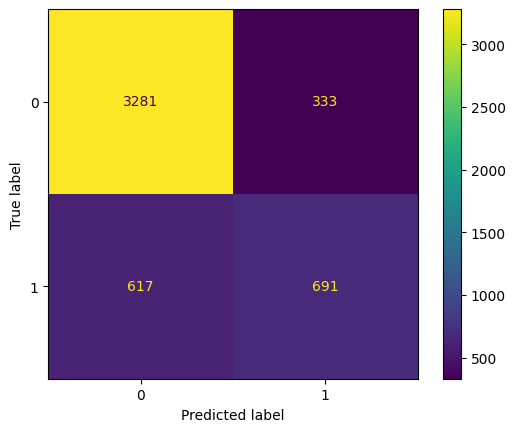

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, predict_train)

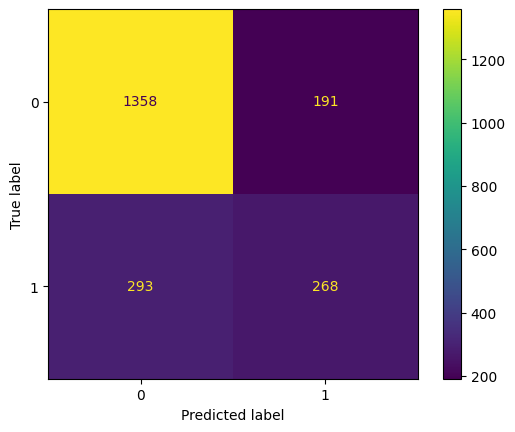

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_test)

In [ ]:
print(classification_report(y_train, predict_train))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3614
           1       0.67      0.53      0.59      1308

    accuracy                           0.81      4922
   macro avg       0.76      0.72      0.73      4922
weighted avg       0.80      0.81      0.80      4922



In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1549
           1       0.58      0.48      0.53       561

    accuracy                           0.77      2110
   macro avg       0.70      0.68      0.69      2110
weighted avg       0.76      0.77      0.76      2110



In [ ]:
#### Comparando os modelos

y_pred_train_logist = logistic.predict(X_train_norm)
y_pred_train_knn = neigh.predict(X_train_norm)
y_pred_train_dt = decTree.predict(X_train_norm)

y_pred_test_logist = logistic.predict(X_test_norm)
y_pred_test_knn = neigh.predict(X_test_norm)
y_pred_test_dt = decTree.predict(X_test_norm)

print(f'------------Regressão Logistica Treinamento:')
print(classification_report(y_train, y_pred_train_logist, zero_division = 0))
print(f'------------KNN Treinamento:')
print(classification_report(y_train, y_pred_train_knn, zero_division = 0))
print(f'------------Decision Tree Treinamento:')
print(classification_report(y_train, y_pred_train_dt, zero_division = 0))

------------Regressão Logistica Treinamento:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3614
           1       0.65      0.55      0.60      1308

    accuracy                           0.80      4922
   macro avg       0.75      0.72      0.73      4922
weighted avg       0.79      0.80      0.80      4922

------------KNN Treinamento:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3614
           1       0.67      0.53      0.59      1308

    accuracy                           0.81      4922
   macro avg       0.76      0.72      0.73      4922
weighted avg       0.80      0.81      0.80      4922

------------Decision Tree Treinamento:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      3614
           1       0.63      0.64      0.64      1308

    accuracy                           0.80      4922
   macro avg   

In [ ]:
print(f'------------Regressão Logistica Teste:')
print(classification_report(y_test, y_pred_test_logist, zero_division = 0))
print(f'------------KNN Teste:')
print(classification_report(y_test, y_pred_test_knn, zero_division = 0))
print(f'------------Decision Tree Teste:')
print(classification_report(y_test, y_pred_test_dt, zero_division = 0))

------------Regressão Logistica Teste:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

------------KNN Teste:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1549
           1       0.58      0.48      0.53       561

    accuracy                           0.77      2110
   macro avg       0.70      0.68      0.69      2110
weighted avg       0.76      0.77      0.76      2110

------------Decision Tree Teste:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1549
           1       0.58      0.61      0.60       561

    accuracy                           0.78      2110
   macro avg       0.72      0.73

#### Tentando aprimorar os hiper-parametros da arvore de decisao com  cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth' : [10, 20, 30, 40, 50, 100],
    'class_weight' : [ {0:1, 1:1}, {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:8}, {0:1, 1:10} ]
  }

dt = DecisionTreeClassifier()
dt = GridSearchCV(dt, parameters, cv = 5, scoring = 'f1_macro')
dt.fit(X_train_norm, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 4}, {0: 1, 1: 8},
                                          {0: 1, 1: 10}],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50, 100]},
             scoring='f1_macro')

In [ ]:
pd.DataFrame( dt.cv_results_ )[['params','mean_test_score']]

In [ ]:
best_model = dt.best_estimator_

In [ ]:
predict_train = best_model.predict(X_train_norm)
predict_test= best_model.predict(X_test_norm)

In [ ]:
print(f'------------Decision Tree Treinamento:')
print(classification_report(y_train, predict_train))

------------Decision Tree Treinamento:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3614
           1       0.64      0.88      0.74      1308

    accuracy                           0.84      4922
   macro avg       0.80      0.85      0.81      4922
weighted avg       0.87      0.84      0.85      4922



In [ ]:
print(f'------------Decision Tree Teste:')
print(classification_report(y_test, predict_test))

------------Decision Tree Teste:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1549
           1       0.49      0.67      0.56       561

    accuracy                           0.72      2110
   macro avg       0.67      0.71      0.68      2110
weighted avg       0.76      0.72      0.74      2110



### Qual modelo apresenta o maior desempenho em treinamento?
### Qual modelo apresenta o maior desempenho em teste?
### Qual modelo você selecionaria para colocar em um sistema de previsão de churn?

* O modelo com maior desempenho em treinamento foi a Árvore de Decisão, ela apresentou taxas de recall muito significativas, acima de 82%

* Também em teste, a Árvore de decisão foi campeã, com taxas de recall acima de 67%.

* Eu selecionaria esse modelo de Árvore de Decisão para tentar prever o churn dadas as circunstâncias.